# Supermarket Sales

We know that the growth of supermarkets in most populated cities and even in the developing towns are increasing day by day and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 

So, the dataset is basically retrieved from [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). The dataset is potentially able to use Predictive data analytics methods.

The whole data is having 1000 rows and 17 columns. The columns does have nearly all the attributes needed to answer the questions that can decide the behavior of the trending sales.

For further analysis, we'll be using ['Jupyter Notebook'](https://jupyter.org/) to run the code and vizulaise.

We'll be using several libraries of Python to carve out a meaningful result, like ['Numpy'](https://numpy.org/doc/stable/user/absolute_beginners.html) and  ['Pandas'](https://pandas.pydata.org/docs/) for dealing with numeric values and data cleaning purpose, ['Matplotlib'](https://matplotlib.org/) and ['Seaborn'](https://seaborn.pydata.org/tutorial.html) for 'Data Visualization'.



### Downloading the Dataset

In this notebook, we'll analyze the **Supermarket Sales** dataset. The dataset contains historical record of sales data in 3 different supermarkets.

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI.
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL.
* Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.
* We'll use the opendatasets helper library to download the files.

We'll use the `opendatasets` helper library to download the files.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/download?datasetVersionNumber=3' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dggpt2
Your Kaggle Key: ········


100%|██████████| 35.9k/35.9k [00:00<00:00, 25.7MB/s]

In [5]:
data_dir = './supermarket-sales'

In [6]:
import os
os.listdir(data_dir)

['supermarket_sales.csv', '.ipynb_checkpoints']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "supermarket-sales" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

### Data Preparation

Though there is a wealth of information in the provided dataset, but still a dataset may have something unwanted that is not beneficial to our analysis. Thus, beforehand, we need to explore our data and make it a bit clean to bring out some unseful insights from it.

#### `Load dataset in dataframe`

Let's load the CSV files using the Pandas library. We'll use the name sales_raw_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [11]:
import pandas as pd
import numpy as np

In [12]:
sales_raw_df = pd.read_csv('supermarket-sales/supermarket_sales.csv')
sales_raw_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


The dataset have several categories of products being sold in 3 different branches of supermarket. All of the orders do have a unique invoice ID. The customers are even categorised as member who might have taken the membership and normal customers.

Let's view the top 5 rows and bottom 5 rows in the data frame to overview the dataset we'll be working on.

In [13]:
sales_raw_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
sales_raw_df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


The meanings of the given columns are mentioned below:
    
**`Attribute information`**

* Invoice id: Computer generated sales slip invoice identification number

* Branch: Branch of supercenter (3 branches are available identified by A, B and C).

* City: Location of supercenters

* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

* Gender: Gender type of customer

* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

* Unit price: Price of each product in Dollar.

* Quantity: Number of products purchased by customer

* Tax: 5% tax fee for customer buying

* Total: Total price including tax

* Date: Date of purchase (Record available from January 2019 to March 2019)

* Time: Purchase time (10am to 9pm)

* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

* COGS: Cost of goods sold

* Gross margin percentage: Gross margin percentage

* Gross income: Gross income

* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



We can check the data types of the columns given, as shown below:

In [15]:
sales_raw_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [16]:
sales_columns = sales_raw_df.columns

It is always preferred to have a copy of the original data and work on it so that the modifications does not affect the original dataframe.
To achieve this, let's extract a copy of the data from these columns into a new data frame sales_df.

In [17]:
sales_df = sales_raw_df[sales_columns].copy()

### Data Exploration and Cleaning

Attribute to check the number of rows and columns available in the dataset. 

In [18]:
sales_df.shape

(1000, 17)

First of all we need to rename the existing columns as the column's name are having two words in it, that won't be ideal for further analysis.

In [19]:
sales_df = sales_df.rename(columns = {' Customer type  ' : ' Customer_Type  ',
                                                    'Product line' : 'Product_Line',
                                                    'Unit price' : 'Unit_Price',
                                                    'gross margin percentage' : 'Gross_Margin_Percentage' ,
                                                     'gross income' : 'Gross_Income'})

In [20]:
sales_df.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'Gross_Margin_Percentage', 'Gross_Income',
       'Rating'],
      dtype='object')

Now, we can check the top 5 rows in the dataframe after being renamed to verify the changes done.

In [21]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product_Line,Unit_Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Gross_Margin_Percentage,Gross_Income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Invoice Id for an order is always unique, so we can change the index to Invoice ID just for the sake of the attraction of our dataset.

In [22]:
sales_df.set_index('Invoice ID', inplace=True)    # index changed to Invoice ID

In [23]:
sales_df

,Branch,City,Customer type,Gender,Product_Line,Unit_Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Gross_Margin_Percentage,Gross_Income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [24]:
# Info method is used to check the datatypes and the no. of non-null values
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product_Line             1000 non-null   object 
 5   Unit_Price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  Gross_Margin_Percentage  1000 non-null   float64
 14  Gross_Income

There are no null values as non-null count of every column is same as the total number of rows(1000). Only 1 column is detected to be having a numeric value.

In [25]:
sales_df['Date'] 

Invoice ID
750-67-8428     1/5/2019
226-31-3081     3/8/2019
631-41-3108     3/3/2019
123-19-1176    1/27/2019
373-73-7910     2/8/2019
                 ...    
233-67-5758    1/29/2019
303-96-2227     3/2/2019
727-02-1313     2/9/2019
347-56-2442    2/22/2019
849-09-3807    2/18/2019
Name: Date, Length: 1000, dtype: object

We have Date and Time as an object, thus, we can change their datatype to date and time using the methods below.

In [26]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [27]:
sales_df['Time'] = pd.to_datetime(sales_df['Time'])

#### `Adding day, month, year and hour column`

Now, as we do have unique values of date, time, year and hour, we can create new columns respectively to help ourselves in further analysis.

In [28]:
sales_df['Day'] = (sales_df['Date']).dt.day
sales_df['Month'] = (sales_df['Date']).dt.month
sales_df['Year'] = (sales_df['Date']).dt.year
sales_df['Hour'] = (sales_df['Time']).dt.hour 

Let's check if added wisely.

In [29]:
sales_df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [30]:
sales_df['Month'].unique()

array([1, 3, 2])

In [31]:
sales_df['Year'].unique()

array([2019])

In [32]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product_Line             1000 non-null   object        
 5   Unit_Price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                  

In [33]:
sales_df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product_Line               0
Unit_Price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
Gross_Margin_Percentage    0
Gross_Income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

### Exploratory Data Analysis and Visualization

The analysis would help us in answering the questions later by understanding the customer demands or needs better, i.e., the payment method customers prefer, product categories purchased across cities, different branches etc. 

It's essential to explore these variables to predict how sales behavior around the supermarket. 

#### `Statistical Data`
Now, let's view some basic statistics about numeric columns.

In [34]:
sales_df.describe()

,Unit_Price,Quantity,Tax 5%,Total,cogs,Gross_Margin_Percentage,Gross_Income,Rating,Day,Month,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


We can see that the mean and median does not have much difference, therefore either there is minimum outliers or the values are balanced on both positive and negative side.

Now, let's check the correlation between the numerical or statistical columns.

In [35]:
sales_df.corr()

,Unit_Price,Quantity,Tax 5%,Total,cogs,Gross_Margin_Percentage,Gross_Income,Rating,Day,Month,Year,Hour
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Gross_Margin_Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762


We need to round the decimal points to make the data more clear and efficient.

In [36]:
sales_corr = np.round(sales_df.corr(),2)

In [37]:
sales_corr

,Unit_Price,Quantity,Tax 5%,Total,cogs,Gross_Margin_Percentage,Gross_Income,Rating,Day,Month,Year,Hour
Unit_Price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Gross_Margin_Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross_Income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


The gross margin percentage has NaN value througout the dataset, thus, there is no relation with any other columns. 

In [38]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

Now, we stand in a position to find the correlation between numeric columns using Heatmaps.

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

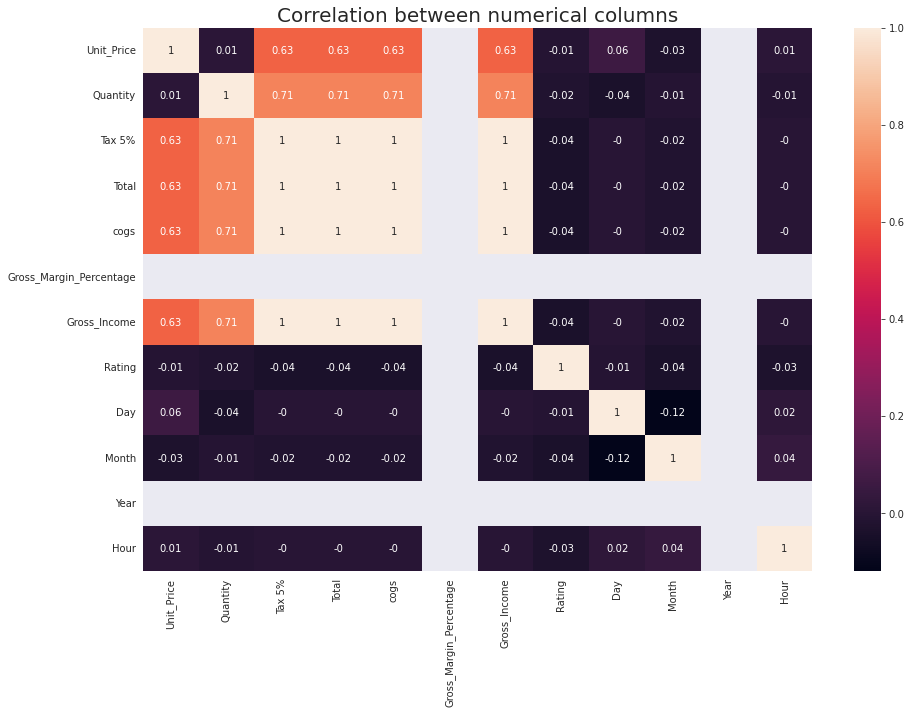

In [78]:
plt.figure(figsize = (15, 10))
sns.heatmap(sales_corr, annot = True)
plt.title("Correlation between numerical columns", fontsize= 20)
plt.show()

The highest correlation which we can draw from above heatmap is between Quantity and Tax, Quantity and Total Sales, Quantity and Cogs, Quantity and Gross Income. The correlation is 0.71 in each of the above.

In [41]:
sales_df.mean()

/tmp/ipykernel_62/2906524947.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sales_df.mean()
/tmp/ipykernel_62/2906524947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales_df.mean()


Unit_Price                   55.672130
Quantity                      5.510000
Tax 5%                       15.379369
Total                       322.966749
cogs                        307.587380
Gross_Margin_Percentage       4.761905
Gross_Income                 15.379369
Rating                        6.972700
Day                          15.256000
Month                         1.993000
Year                       2019.000000
Hour                         14.910000
dtype: float64

The average price of an item in the supermarket is 56 USD. 6 units of such items has been sold with an average profit of 15 
USD excluding taxes and with a profit margin of 5%.

In [42]:
sales_df.max()

Branch                                       C
City                                    Yangon
Customer type                           Normal
Gender                                    Male
Product_Line                 Sports and travel
Unit_Price                               99.96
Quantity                                    10
Tax 5%                                   49.65
Total                                  1042.65
Date                       2019-03-30 00:00:00
Time                       2022-11-23 20:59:00
Payment                                Ewallet
cogs                                     993.0
Gross_Margin_Percentage               4.761905
Gross_Income                             49.65
Rating                                    10.0
Day                                         31
Month                                        3
Year                                      2019
Hour                                        20
dtype: object

The most selling items in the supermarket at Branch C is Sports & Travel. It contributes 5% of profit alone and leaving a profit of 40 USD excluding taxes.Mostly purchased by Male and is with a rating of 10.

In [43]:
sales_df.min()

Branch                                          A
City                                     Mandalay
Customer type                              Member
Gender                                     Female
Product_Line               Electronic accessories
Unit_Price                                  10.08
Quantity                                        1
Tax 5%                                     0.5085
Total                                     10.6785
Date                          2019-01-01 00:00:00
Time                          2022-11-23 10:00:00
Payment                                      Cash
cogs                                        10.17
Gross_Margin_Percentage                  4.761905
Gross_Income                               0.5085
Rating                                        4.0
Day                                             1
Month                                           1
Year                                         2019
Hour                                           10


The Electronic accessories in the Supermarket at Branch A is not working well. The total units sold is 1 with an income of 0.50 USD excluding taxes.

####  `Distribution of numeric columns`

We can explore the data further by checking the distribution of numeric columns using histograms.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

Let's plot `Total sales per hour` using LinePlot.

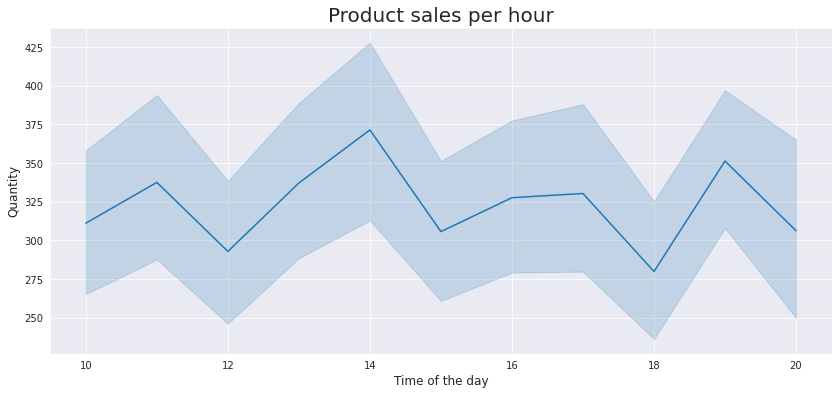

In [76]:
plt.figure(figsize = (14, 6))
sns.lineplot(x = 'Hour', y ='Total', data = sales_df)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

We can see that the sales is highest at 2pm. Good volume of sales is recorded around 5pm and 7pm. The sales is recorded to be the lowest around 12pm, 3pm and 6pm.

We can even check for `Total sales per Day` using Line Plot.

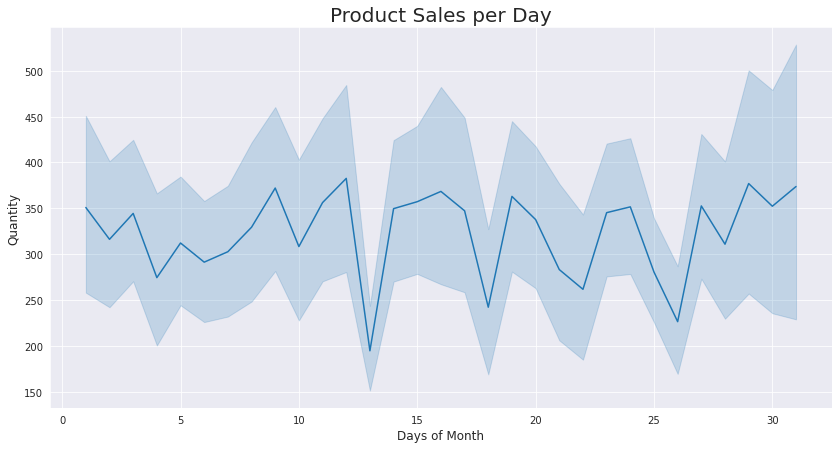

In [75]:
plt.figure(figsize = (14, 7))
sns.lineplot(x = 'Day', y = 'Total', data = sales_df)
plt.title('Product Sales per Day', fontsize=20)
plt.xlabel('Days of Month', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

On an average we can see that the sales of products per day is unevenly distributed. There cannot be any pattern drawn.

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

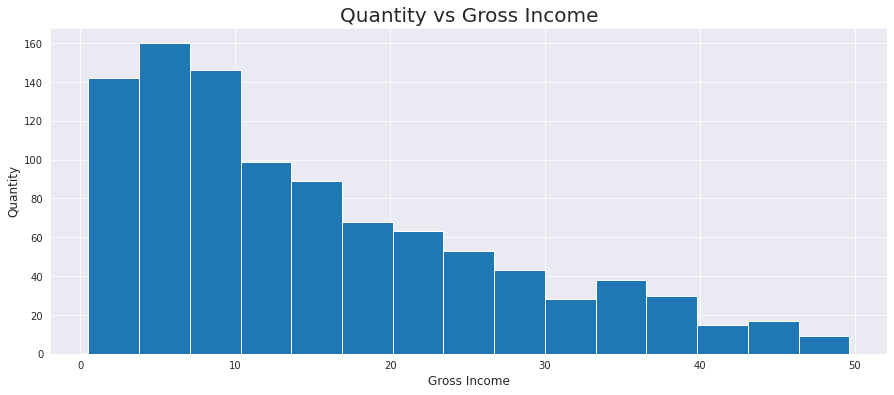

In [74]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.title('Quantity vs Gross Income', fontsize = 20)
plt.xlabel('Gross Income', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.hist(sales_df.Gross_Income, bins = 15, ec = 'White')
plt.show()

We can clearly see that as the gross income decreases with the decrease in quantities sold.

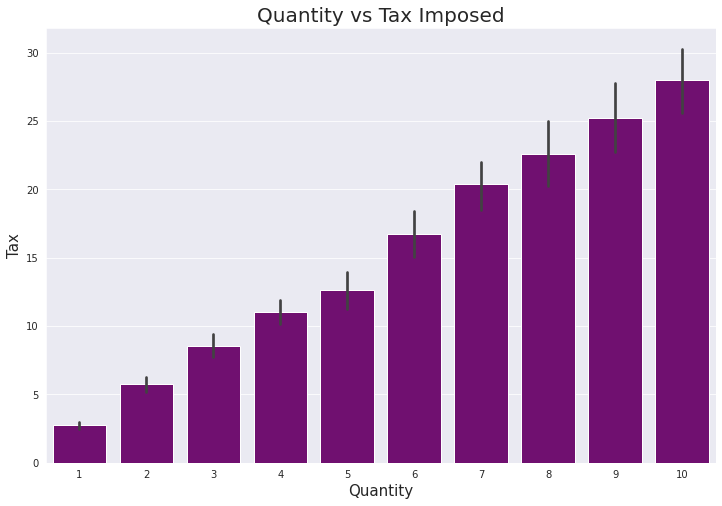

In [88]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x="Quantity", y= "Tax 5%", data = sales_df, color='Purple')
ax.set_title(label = "Quantity vs Tax Imposed", fontsize= 20)      #object oriented style
ax.set_xlabel(xlabel = "Quantity", fontsize = 15)
ax.set_ylabel(ylabel = "Tax", fontsize = 15)
plt.show()

From the above graph,we can conclude that with the increase in sales of item quantity, imposed tax on the items also increases.

<Figure size 864x576 with 0 Axes>

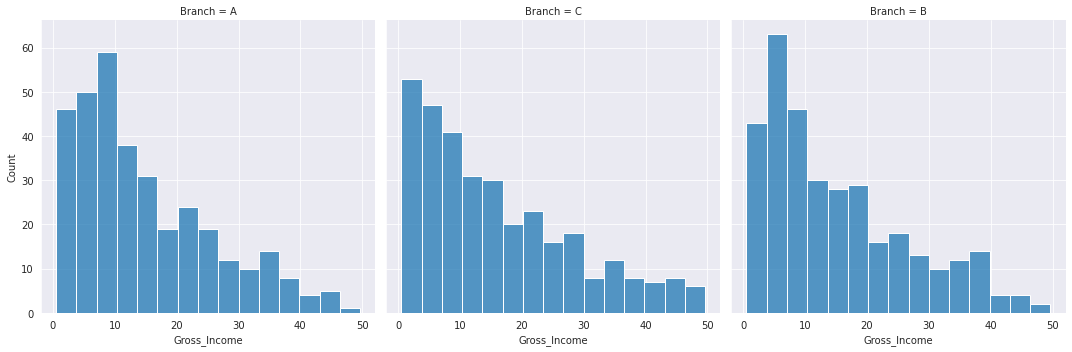

In [72]:
plt.figure(figsize = (12,8))
sns.displot(sales_df, x="Gross_Income", col="Branch", multiple = "dodge")
plt.show()

Branch B, has much higher income in compare to Branch C irrespective of the items sold.

In [50]:
payment_methods = sales_df.Payment.value_counts()
payment_methods

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

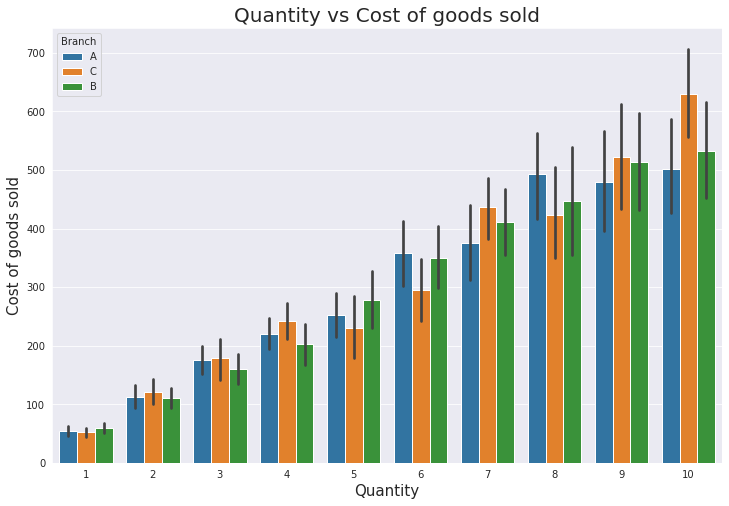

In [71]:
plt.figure(figsize = (12, 8))
sns.barplot(x= "Quantity", y = 'cogs', hue = "Branch", data = sales_df)
plt.title("Quantity vs Cost of goods sold", fontsize= 20)
plt.xlabel(xlabel = "Quantity", fontsize = 15)
plt.ylabel(ylabel = "Cost of goods sold", fontsize = 15)
plt.show()

As the Quantity is increasing, the cost of good sold also increases.

Lets see the distribution for different columns depending upon their row values.

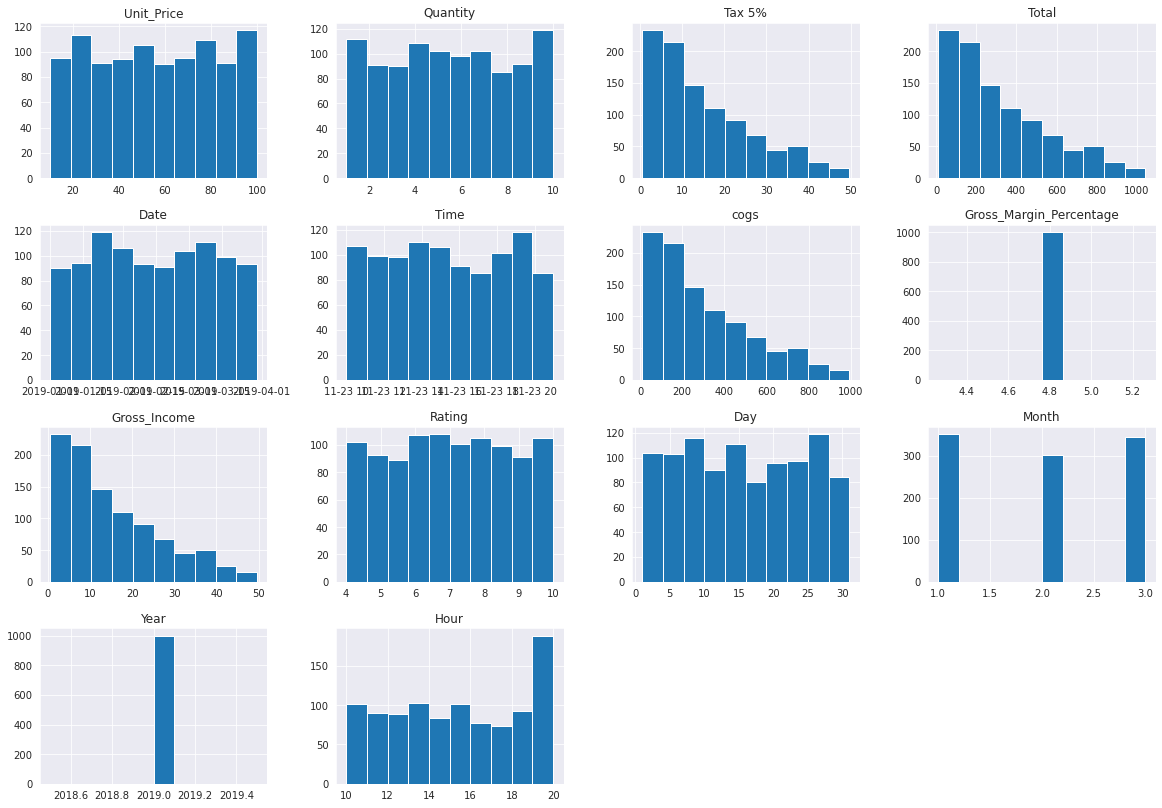

In [87]:
sales_df.hist(figsize=(20,14))
plt.show()

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

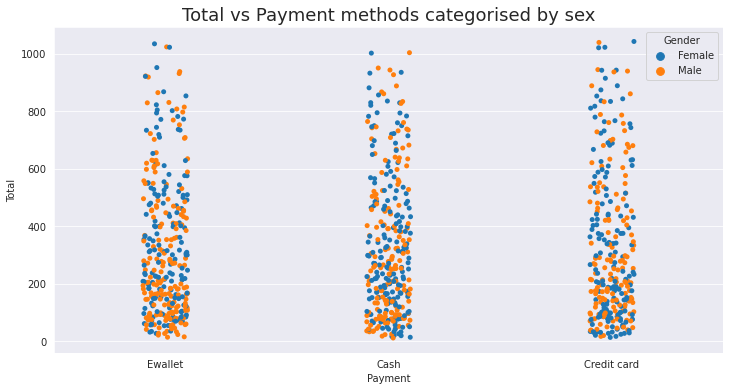

In [70]:
plt.figure(figsize = (12,6))
sns.stripplot(y='Total',x='Payment',hue='Gender',data=sales_df)
plt.title("Total vs Payment methods categorised by sex", fontsize = 18)
plt.show()

#### `Customers and Branches`

In a store, it is most important to find the type of customers, in terms of their interest, so that one can introduce more exclusive offers to increase the sales and find the highly demanded product category and the lowest among the customers. 

In [56]:
sales_df.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


#### `Customers in different branches`

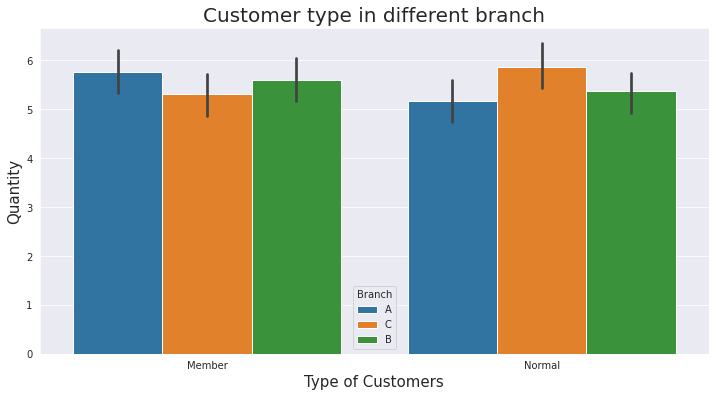

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Customer type", y="Quantity", hue = "Branch", data = sales_df)
plt.title("Customer type in different branch", fontsize = 20)
plt.xlabel( "Type of Customers", fontsize = 15)
plt.ylabel("Quantity", fontsize = 15)
plt.show()

At branch A, members do more purchases and normal customers at branch C. At branch B, approximately equal purchases are done by members and normal customers.

#### `Payment methods at different branches`

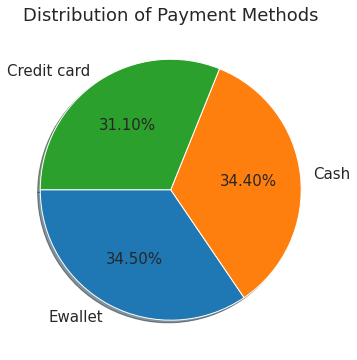

In [58]:
plt.figure(figsize=(15, 6))
#explode = [0.03,0,0.1,0,0]
plt.title("Distribution of Payment Methods", fontsize = 18)
plt.pie(payment_methods, labels=payment_methods.index, 
            
             autopct='%0.2f%%', pctdistance=0.6, shadow=True, radius = 1.0, startangle=180, textprops = {"fontsize":15});

With this pie chart, when we look across all the branches and cities, we can see that there is not much difference in paying with cash or eWallet rather than credit card.

But, with the below categorical plot, we can conclude:
* At Branch A,members are using Ewallet more than normal customers, however there is not much difference in paying Cash or with Credit card. 
* At Branch B, members and normal customers are nearly equally using the Ewallet and cash, but the members are using more credit card comparatively.
* At Branch C, things are pretty changed, Ewallets are being used slightly more by normal customers and there is a gap of about 10% in using credit card by members.

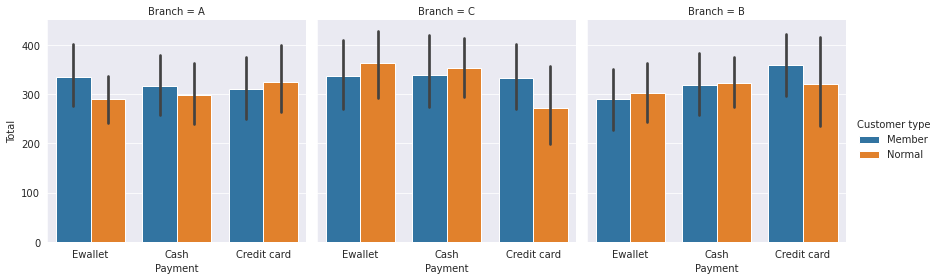

In [85]:
sns.catplot(x="Payment", y="Total",  hue="Customer type", col="Branch",
                data=sales_df, kind="bar",height=4)
plt.show()

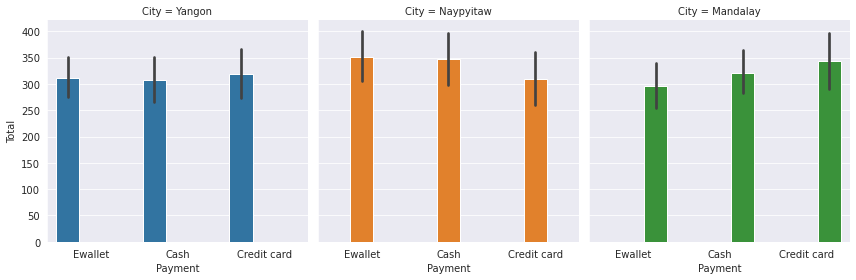

In [86]:
sns.catplot(x="Payment", y="Total",  hue="City", col="City",
                data=sales_df, kind="bar",height=4)
plt.show()

If we talk about cities, in Yangon, all of the payment methods are equally used, in Naypyitaw, eWallets and cash payments are mostly done and in Mandalay, credit cards are mostly preferred.

In [61]:
payment_pct = sales_df.Payment.value_counts() * 100 / sales_df.Payment.count()
payment_pct

Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: Payment, dtype: float64

It means, 50.1% shopping is done by Females and 49.9% purchases are done by Males across the branches.

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

<Figure size 864x432 with 0 Axes>

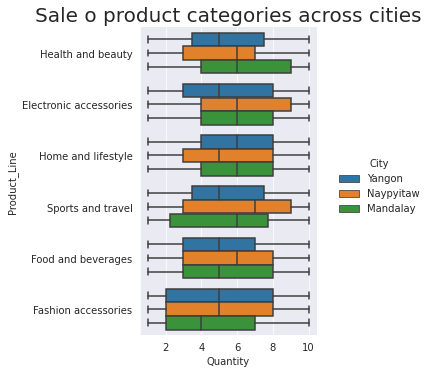

In [82]:
plt.figure(figsize=(12,6))
sns.catplot(data=sales_df, x="Quantity", y="Product_Line", hue="City", kind="box")
plt.title("Sale o product categories across cities", fontsize = 20)
plt.show()

Health and beauty products are sold more in Mandalay, while in Naypyitaw, Electronic accessories are highly sold. Home & Lifesyle items are sold equally in all the 3 cities. Naypyitaw seems to be the top seller of Sports & travel items. In Yangon, Food & Beverages seems to be sold comparatively less than other 2 cities, while in Mandalay, Fashion accesories are sold less.

#### `Product Categories across different Branches`

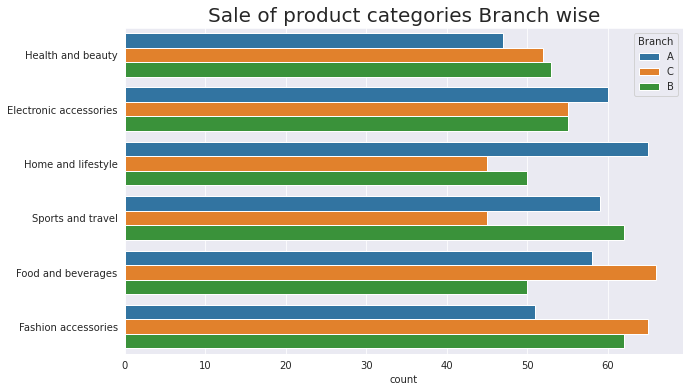

In [64]:
plt.figure(figsize = (10, 6))
sns.countplot( y=sales_df.Product_Line, hue = "Branch", data = sales_df, dodge = True)

plt.title("Sale of product categories Branch wise", fontsize = 20)
plt.ylabel(None);

At branch A, Home and Lifestyle products are sold higher than other items, while at branch B, Soprts & travel and Fashion Accesories are the most sellable items. At branch C, Food & Beverages and Fashion Accesories items are more likely to be sold coparatively to other categories.

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepak-gupta15336/supermarket-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/deepak-gupta15336/supermarket-sales


'https://jovian.ai/deepak-gupta15336/supermarket-sales'

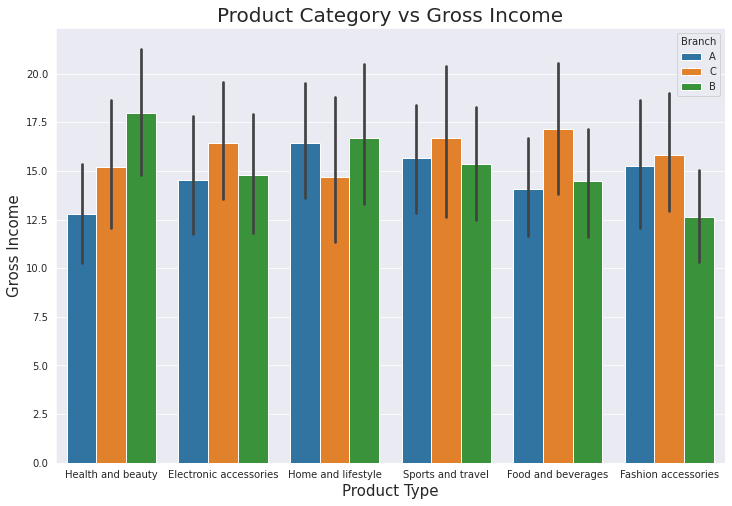

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product_Line',y='Gross_Income',hue='Branch',data=sales_df)
plt.title('Product Category vs Gross Income',fontsize= 20)
plt.xlabel('Product Type',fontsize=15)
plt.ylabel('Gross Income',fontsize=15)
plt.show()

The highest gross income is recorded in Branch B for health and beauty. Branch A generates less income for health and beauty items and branch B in Fashion accessories. The gross income in Branch C is similar for all product category.

### Asking and Answering Questions


We've already gained several insights about the sales, product categories sold, income etc across different branches and the cities by exploring individual columns of the dataset. 
Let's ask some specific questions and try to answer them using data frame operations and visualizations.

##### Q: Which product category generates more revenue by different genders?

It'd be interesting to know the types of products males and females prefers across a wide range of available items. For this we can use displot from the seaborn library so that females and males preferences can be shown uniquely.

<Figure size 1080x576 with 0 Axes>

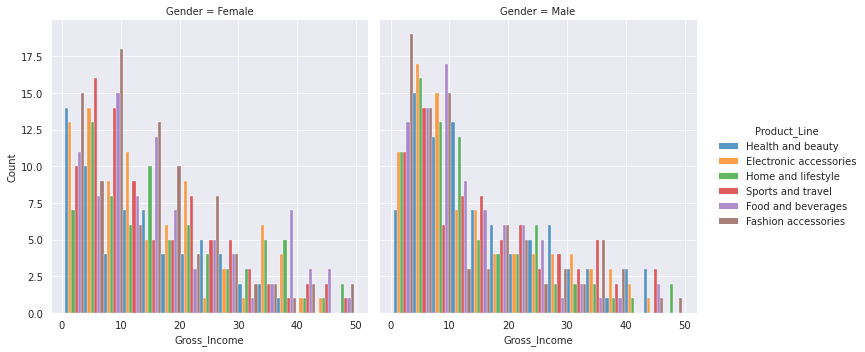

In [89]:
plt.figure(figsize=(15,8))
sns.displot(sales_df, x="Gross_Income", hue="Product_Line", multiple="dodge", col = 'Gender')

Sale of fashion accesories contributes the most in the income of the stores whether it is for male or female across all the cities or branches. 

##### Q: Which branch has the highest sales?

To keep the competition alive and the business running, we need to compete among the branches. We can check the level of competency among the branches using the groupby method and as visualized below.

In [90]:
SalesPerBranch=sales_df.groupby('Branch')['Total'].sum()
SalesPerBranch

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales per branch')

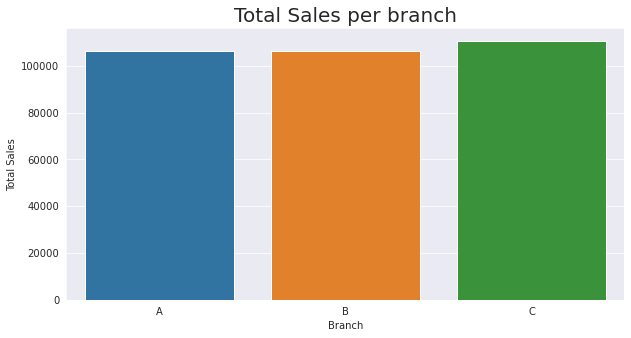

In [91]:
plt.figure(figsize =(10, 5) )
sns.barplot(x=SalesPerBranch.index , y=SalesPerBranch.values)
plt.ylabel('Total Sales')
plt.title('Total Sales per branch', fontsize = 20)

We can say that almost all branches have same performance, just Branch C has little more sales.

##### Q:  How many products are bought by an individual customer in a single order?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


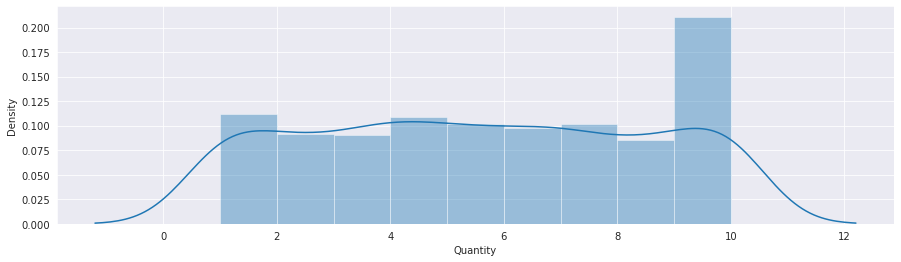

In [93]:
plt.figure(figsize = (15,4))
sns.distplot(sales_df['Quantity'])
plt.show()

In a single order, an individual bought 10 items altogether.

##### Q: Which City use more cash comparing to other payment methods?

<Figure size 1080x288 with 0 Axes>

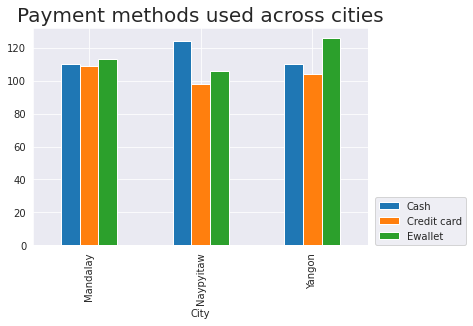

In [96]:
plt.figure(figsize = (15,4))
pd.crosstab(sales_df['City'],sales_df['Payment']).plot.bar()
plt.legend(loc = (1.02, 0))
plt.title("Payment methods used across cities", fontsize = 20)
plt.show()

We can conclude that in Naypyitaw, cash is the most prefrred payment method while in Yangon, Ewallet is the most preferred. In Mandalay, all of the payment methods arge equivalently used. 

##### Q: Find highest sale on a day in all months across all branches.

Decoding month columns with their names.

In [97]:
sales_df["Month"]=sales_df["Month"].replace({1:"January"})
sales_df["Month"]=sales_df["Month"].replace({2:"February"})
sales_df["Month"]=sales_df["Month"].replace({3:"March"})
sales_df.head(2)

,Branch,City,Customer type,Gender,Product_Line,Unit_Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Gross_Margin_Percentage,Gross_Income,Rating,Day,Month,Year,Hour
Invoice ID,,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-11-23 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,2019,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-11-23 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,2019,10


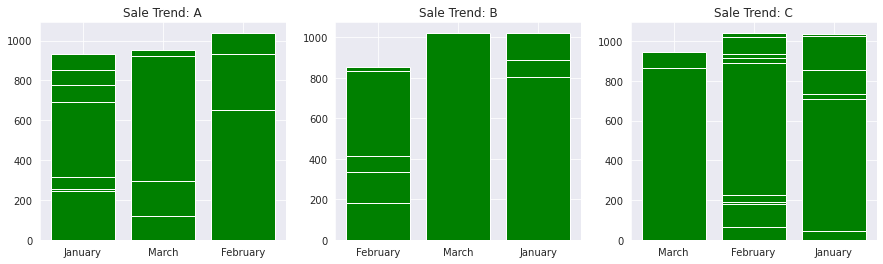

In [98]:
a=sales_df[sales_df["Branch"] =="A"]
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.bar(a["Month"],a["Total"],color = 'green')
plt.title("Sale Trend: A")

b=sales_df[sales_df["Branch"] =="B"]
plt.subplot(1,3,2)
plt.bar(b["Month"],b["Total"],color = 'green')
plt.title("Sale Trend: B")

c=sales_df[sales_df["Branch"] =="C"]
plt.subplot(1,3,3)
plt.bar(c["Month"],c["Total"],color = 'green')
plt.title("Sale Trend: C")
plt.show() 

**At branch A**
* Highest sale : February
* Lowest sale : January

**At branch B**
* Highest sale : March
* Lowest sale : February

**At branch C**
* Highest sale : February
* Lowest sale : March

### Conclusions 

* Sale of items varies in different timings of the day but, conclusively, it is uneven when considered daywise across the month.
* Branch B, has much higher income in compare to Branch C irrespective of the items sold.
* Cost of goods sold is directly proportional to the quantities sold.
* Across all the branches and cities, there is not much difference in paying with cash or eWallet.
* Member customers prefers eWallet as payment method, may be because of faster method of payment method than credit card.
* Product categories also play a vital role in generating income at a store.

### Insights  

* The highest correlation is 0.71 between Quantity and Tax, Quantity and Total Sales, Quantity and Cogs, Quantity and Gross Income.

* The sales is highest at 2pm. Good volume of sales is recorded around 5pm and 7pm and the sales is recorded to be the lowest around 12pm, 3pm and 6pm.

* Each of the 3 cities Yangon, Naypyitaw, Mandalay has got 1 branch each A, B and C with similar Gross Income.

* The most sales is recorded in Home and lifestyle segment made by females.

* In Branch A 'member customers' make more purchases and in Branch C purchases are made more by 'normal customers'.

* Mostly Ewallet and Credit card is used for payments in all 3 branches.

* Sale of fashion accesories contributes the most in the income of the stores whether it is for male or female across all the cities or branches. 

* Each branch has their own demand of the product categories. 

* Branch B leads in sales of Health and beauty and lowest sales of Fashion Accessories. Branch C leads in Electronic Accessories and Sports and travel.

### Proposed Solutions

* Proposed SolutionsBreakfast items should be promoted to increase sales at opening time, the sales between 4pm and 8 pm can be boosted through membership discounts and promotion of products for teen agers and senior citizens.

* Different Membership discounts should be introduced for teenagers, families, senior citizens.

* Male products should be added more in Home and Lifestyle segments. The supermarket needs to concentrate on specific timings of each category of products sold.

* The supermarket should focus on masses and promote products of low and medium prices. Seasonal discounts should be held to increase sales.

### References and Future Work

 Check out the following resources to learn more about the dataset and tools used in this notebook:

* SuperMarket sales: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets

In [ ]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>